### INTRODUCTION
### The Problem
Can stroke be predicted?

In [2]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, classification_report, confusion_matrix, precision_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeClassifier
import datetime

In [3]:
#Let's load the data
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#Drop NaN and ID
df = data.dropna()
df = df.drop(columns=['id'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


### Using Logistic Regression Model

In [6]:
#Let's encode categorical variables
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

#Let's split the data into features and target variables
X = df.drop('stroke', axis=1)
y = df['stroke']

#Time to standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
#Let's create and train the logistic regression model
model = LogisticRegression(max_iter=500, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)

In [8]:
#Make predictions
y_pred = model.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print('Accuracy', accuracy)
print('Classification Report',class_rep, '\n')
print('Confusion Matrix',confusion_mat, '\n')

Accuracy 0.7464358452138493
Classification Report               precision    recall  f1-score   support

           0       0.99      0.74      0.85       929
           1       0.16      0.85      0.27        53

    accuracy                           0.75       982
   macro avg       0.57      0.79      0.56       982
weighted avg       0.94      0.75      0.82       982
 

Confusion Matrix [[688 241]
 [  8  45]] 



### Using Decision Trees

In [10]:
X = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status']]
y = df['stroke']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#Let's create a decision tree classifier
clf= DecisionTreeClassifier(random_state=42)

#Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
#Make predictions on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
class_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print('Accuracy', accuracy, '\n')
print('Classification Report',class_rep, '\n')
print('Confusion Matrix',confusion_mat, '\n')

Accuracy 0.9103869653767821 

Classification Report               precision    recall  f1-score   support

           0       0.95      0.96      0.95       929
           1       0.11      0.09      0.10        53

    accuracy                           0.91       982
   macro avg       0.53      0.53      0.53       982
weighted avg       0.90      0.91      0.91       982
 

Confusion Matrix [[889  40]
 [ 48   5]] 



**With the Decision Tree Classifier, we can see that the accuracy has increased significantly by 17% compared to the Logistic Regression Model**

### Using Random Forest Model

In [15]:
df = pd.get_dummies(df, drop_first=True)

X = df.drop('stroke', axis=1)
y = df['stroke']

print(X,y)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          2   
2          1  80.0             0              1             1          2   
3          0  49.0             0              0             1          2   
4          0  79.0             1              0             1          3   
5          1  81.0             0              0             1          2   
...      ...   ...           ...            ...           ...        ...   
5104       0  13.0             0              0             0          4   
5106       0  81.0             0              0             1          3   
5107       0  35.0             0              0             1          3   
5108       1  51.0             0              0             1          2   
5109       0  44.0             0              0             1          0   

      Residence_type  avg_glucose_level   bmi  smoking_status  
0                  1   

In [16]:
#Let's create and train a random forest model
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [17]:
#Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy', accuracy)

report = classification_report(y_test, y_pred, zero_division=0)
print('Classification Report\n', report)

Accuracy 0.9460285132382892
Classification Report
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



In [18]:
#Let's check class distribution
print('Class Distribution in y_train\n', y_train.value_counts())
print('Class Distribution in y_test\n', y_test.value_counts())

Class Distribution in y_train
 stroke
0    3771
1     156
Name: count, dtype: int64
Class Distribution in y_test
 stroke
0    929
1     53
Name: count, dtype: int64


Logistic Regression Accuracy:  0.9460
Decision Tree Accuracy:  0.9246
Random Forest Accuracy:  0.9460


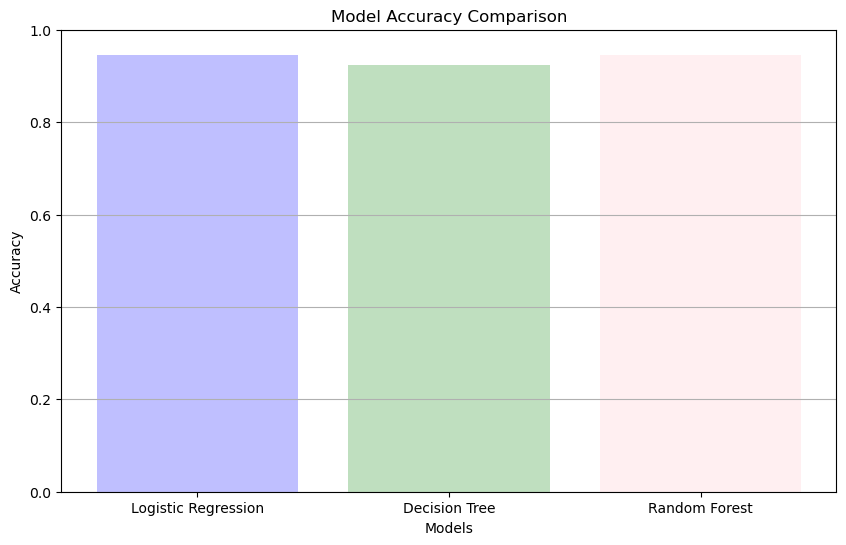

In [19]:
#Let's compare the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=500, random_state=42)
}

#Store the accuracies
accuracies = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'{model_name} Accuracy: {accuracy: .4f}')

#Now let's plot the histogram
plt.figure(figsize=(10,6))
plt.bar(models.keys(), accuracies, color=['blue', 'green', 'pink'], alpha=0.25)
plt.ylim(0,1)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.show()

### Conclusion

**Both the Logistic Regression Model and the Random Forest Model showed the same amount of predictive accuracy at 95%, whereas the Decision Tree Model represented a much lower accuracy.** 